# Mushrooms Data

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.shape

(8124, 23)

In [4]:
df['veil-color'].shape

(8124,)

In [5]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
df['cap-shape']=le.fit_transform(df['cap-shape'])
df['cap-surface']=le.fit_transform(df['cap-surface'])
df['cap-color']=le.fit_transform(df['cap-color'])
df['bruises']=le.fit_transform(df['bruises'])
df['odor']=le.fit_transform(df['odor'])
df['gill-attachment']=le.fit_transform(df['gill-attachment'])
df['gill-spacing']=le.fit_transform(df['gill-spacing'])
df['gill-size']=le.fit_transform(df['gill-size'])
df['gill-color']=le.fit_transform(df['gill-color'])
df['stalk-shape']=le.fit_transform(df['stalk-shape'])
df['stalk-root']=le.fit_transform(df['stalk-root'])
df['stalk-surface-above-ring']=le.fit_transform(df['stalk-surface-above-ring'])
df['stalk-surface-below-ring']=le.fit_transform(df['stalk-surface-below-ring'])
df['stalk-color-above-ring']=le.fit_transform(df['stalk-color-above-ring'])
df['stalk-color-below-ring']=le.fit_transform(df['stalk-color-below-ring'])
df['veil-type']=le.fit_transform(df['veil-type'])
df['veil-color']=le.fit_transform(df['veil-color'])
df['ring-number']=le.fit_transform(df['ring-number'])
df['ring-type']=le.fit_transform(df['ring-type'])
df['spore-print-color']=le.fit_transform(df['spore-print-color'])
df['population']=le.fit_transform(df['population'])
df['habitat']=le.fit_transform(df['habitat'])

In [8]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [10]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

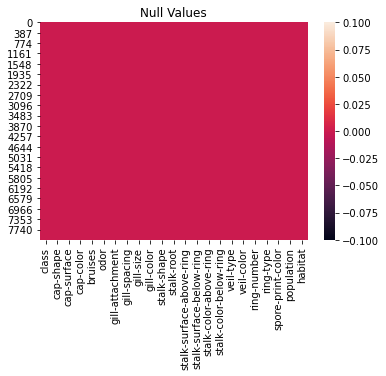

In [11]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

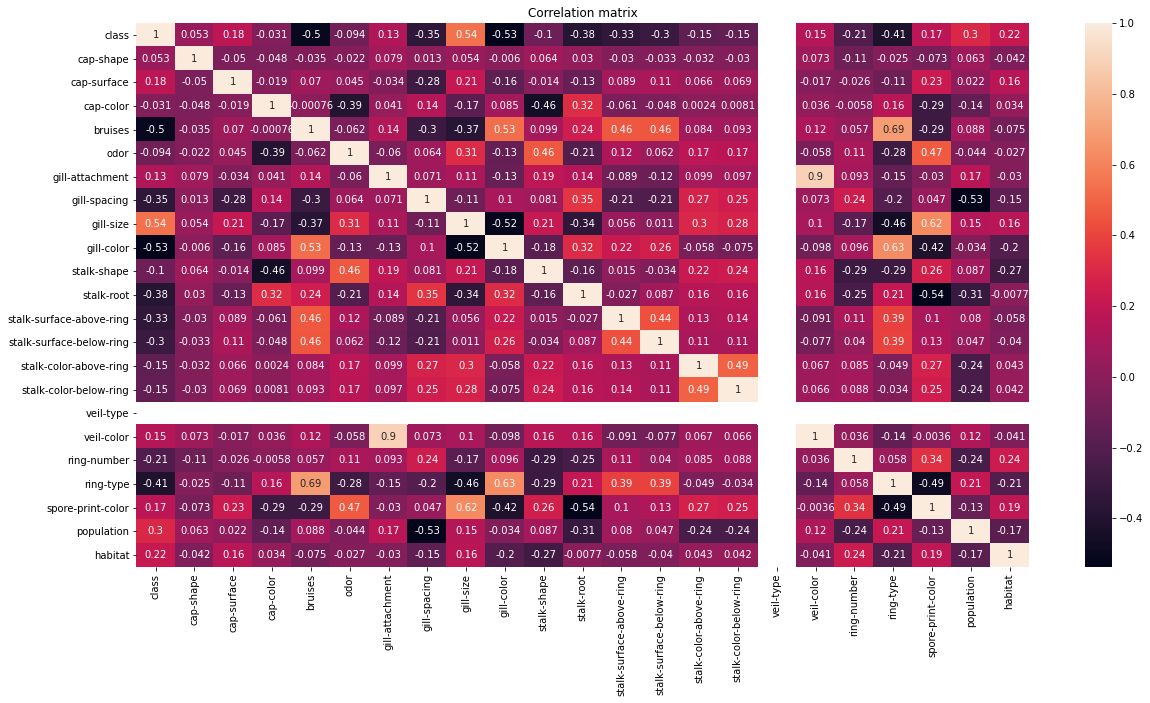

In [12]:
corr=df.corr()                                               # multivariate analysis
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.title('Correlation matrix')
plt.show()

In [13]:
corr_matrix=df.corr()
corr_matrix['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


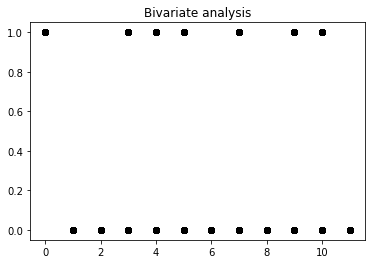

In [14]:
plt.scatter(df['gill-color'],df['stalk-shape'],alpha=0.5,c=(0,0,0))                                        # Bivariate analysis
plt.title("Bivariate analysis")
plt.show()

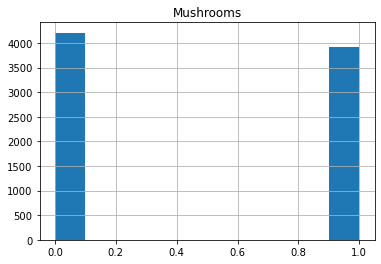

In [15]:
df['class'].hist(grid=True)                # Univariate analysis
plt.title('Mushrooms')
plt.show()

# outliers

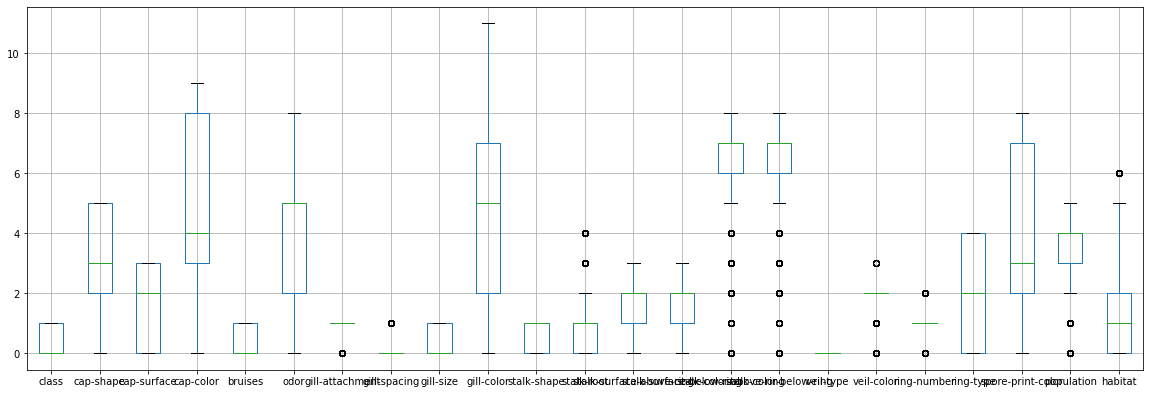

In [26]:
df.iloc[:,0:].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [27]:
#removing outliers
from scipy.stats import zscore

In [28]:
z=np.abs(zscore(df))
z

array([[1.0366127 , 1.02971224, 0.14012794, ..., 0.67019486, 0.5143892 ,
        2.03002809],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.29572966],
       [0.96468045, 2.08704716, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.86714922],
       ...,
       [0.96468045, 0.8403434 , 0.14012794, ..., 1.50964337, 2.11182722,
        0.28570978],
       [1.0366127 , 0.21699152, 0.95327039, ..., 1.42842641, 0.28432981,
        0.28570978],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.16925365, 2.11182722,
        0.28570978]])

In [29]:
threshold=3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 17,  6, 17], dtype=int64))


In [30]:
z[2128][14]

3.058610708783329

In [35]:
z[8121][17]

3.9790548744261973

In [37]:
print(np.where(z<3))

(array([   0,    0,    0, ..., 8123, 8123, 8123], dtype=int64), array([ 0,  1,  2, ..., 20, 21, 22], dtype=int64))


In [36]:
dfnew=df[(z<3).all(axis=1)]

In [41]:
dfnew=df

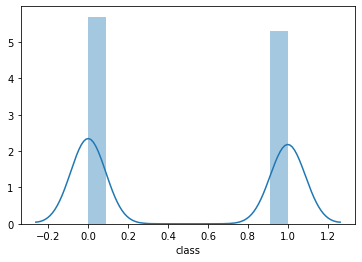

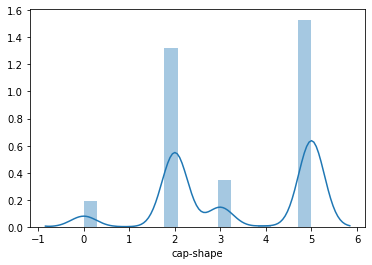

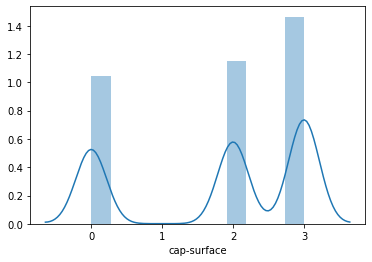

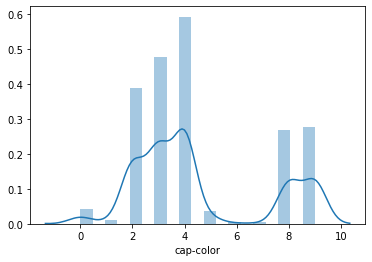

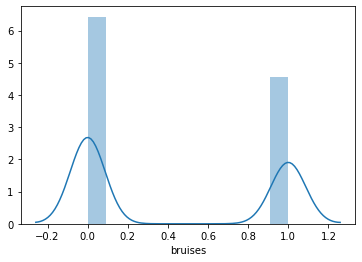

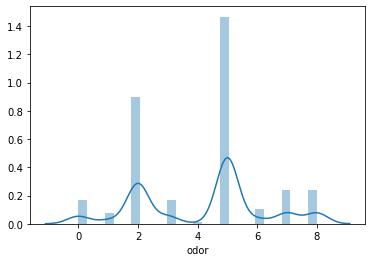

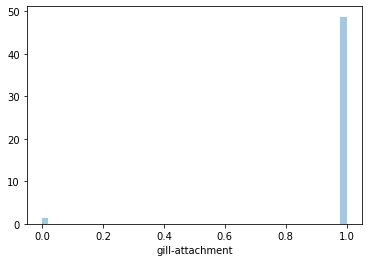

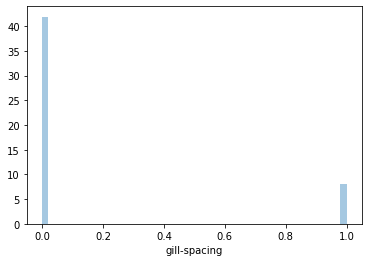

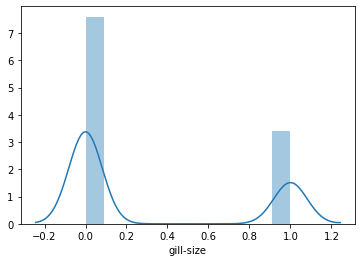

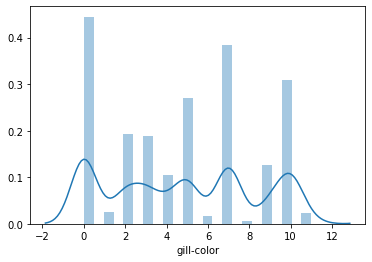

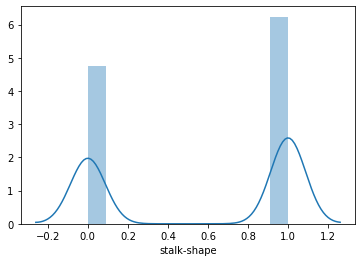

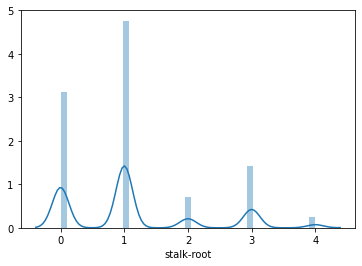

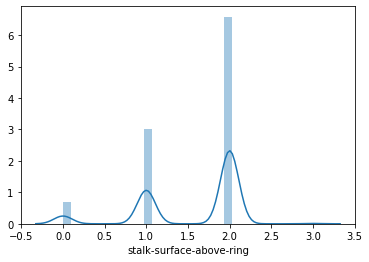

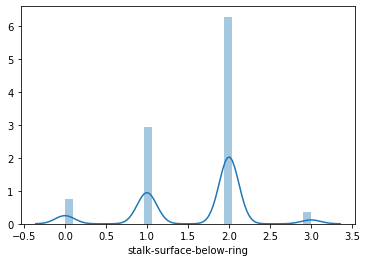

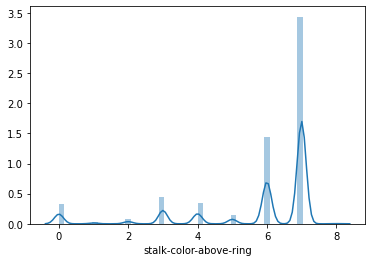

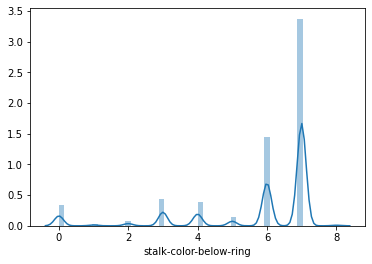

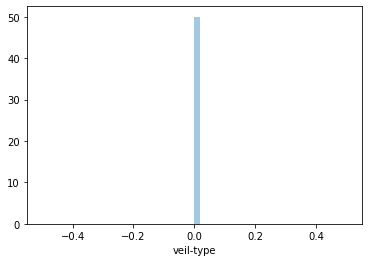

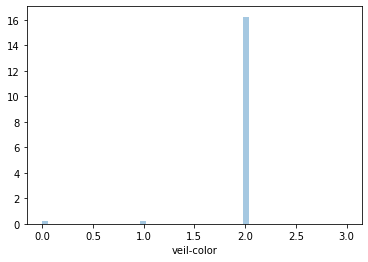

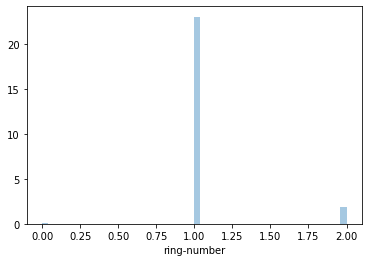

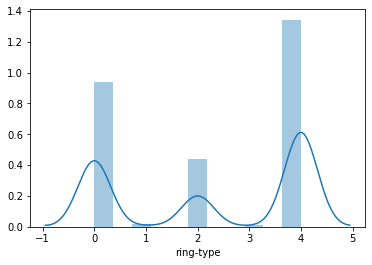

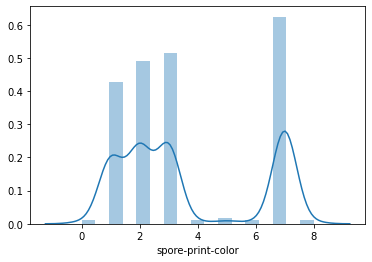

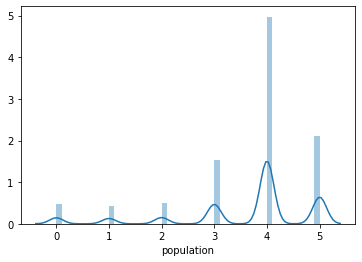

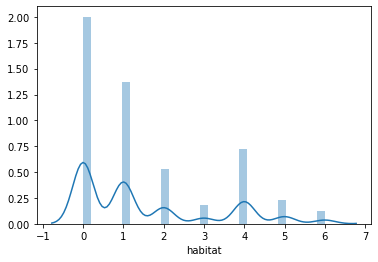

In [42]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

In [43]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [44]:
x=df.drop('class',axis=1)
y=df['class']

In [45]:
x.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [49]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.cbrt(x[i])
    if x[i].skew()<-0.5:
        x[i]=np.cbrt(x[i])
        
x.skew()

0    -0.205860
1    -0.473764
2     0.004059
3     0.342750
4    -0.144660
5    -5.977076
6     1.840088
7     0.825797
8    -0.246738
9    -0.271345
10    0.023182
11   -0.438332
12   -0.114150
13   -0.346556
14   -0.325497
15    0.000000
16   -6.221634
17   -0.499098
18   -0.339232
19    0.018174
20   -0.368219
21    0.123132
dtype: float64

In [52]:
from sklearn.preprocessing import power_transform
x=power_transform(x)
x=pd.DataFrame(x)

In [53]:
x.skew()

0    -0.113532
1    -0.160963
2    -0.174024
3     0.342750
4     0.045186
5    -5.977076
6     1.840088
7     0.825797
8    -0.048351
9    -0.271345
10    0.067329
11    0.493484
12    0.228764
13   -0.270205
14   -0.247828
15    0.000000
16    6.164987
17   -1.745550
18   -0.209795
19   -0.047790
20    0.007618
21    0.065147
dtype: float64

In [54]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.9515106303618053 on Random_state  1
Best Accuracy is  0.9533756061171205 on Random_state  2
Best Accuracy is  0.9533756061171205 on Random_state  2
Best Accuracy is  0.9533756061171205 on Random_state  2
Best Accuracy is  0.9533756061171205 on Random_state  2
Best Accuracy is  0.9533756061171205 on Random_state  2
Best Accuracy is  0.9533756061171205 on Random_state  2
Best Accuracy is  0.9533756061171205 on Random_state  2
Best Accuracy is  0.9533756061171205 on Random_state  2
Best Accuracy is  0.9533756061171205 on Random_state  2
Best Accuracy is  0.9533756061171205 on Random_state  2
Best Accuracy is  0.9563595673256248 on Random_state  12
Best Accuracy is  0.9563595673256248 on Random_state  12
Best Accuracy is  0.9563595673256248 on Random_state  12
Best Accuracy is  0.9563595673256248 on Random_state  12
Best Accuracy is  0.9571055576277508 on Random_state  16
Best Accuracy is  0.9571055576277508 on Random_state  16
Best Accuracy is  0.9571055576277508 on Ra

Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy is  0.9615814994405073 on Random_state  116
Best Accuracy 

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=116)

In [56]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.9615814994405073
[[1322   57]
 [  46 1256]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1379
           1       0.96      0.96      0.96      1302

    accuracy                           0.96      2681
   macro avg       0.96      0.96      0.96      2681
weighted avg       0.96      0.96      0.96      2681



In [57]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

1.0
[[1379    0]
 [   0 1302]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1379
           1       1.00      1.00      1.00      1302

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [58]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9992540096978739
[[1377    2]
 [   0 1302]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1379
           1       1.00      1.00      1.00      1302

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [59]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

1.0
[[1379    0]
 [   0 1302]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1379
           1       1.00      1.00      1.00      1302

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [60]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)
predgn=gn.predict(x_test)
print(accuracy_score(y_test,predgn))
print(confusion_matrix(y_test,predgn))
print(classification_report(y_test,predgn))

0.9313688922044013
[[1317   62]
 [ 122 1180]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.93      1379
           1       0.95      0.91      0.93      1302

    accuracy                           0.93      2681
   macro avg       0.93      0.93      0.93      2681
weighted avg       0.93      0.93      0.93      2681



In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()                                                      #by default = 5
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

1.0
[[1379    0]
 [   0 1302]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1379
           1       1.00      1.00      1.00      1302

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [62]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(lg,x,y,cv=5)
print("cross validation score linear regression model",scr.mean())

cross validation score linear regression model 0.8216003031451308


In [63]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(dt,x,y,cv=5)
print("cross validation score linear regression model",scr.mean())

cross validation score linear regression model 0.9675022356953391


In [64]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ab,x,y,cv=5)
print("cross validation score linear regression model",scr.mean())

cross validation score linear regression model 0.9113494505494506


In [65]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(gn,x,y,cv=5)
print("cross validation score linear regression model",scr.mean())

cross validation score linear regression model 0.7999407351269421


In [66]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(knn,x,y,cv=5)
print("cross validation score linear regression model",scr.mean())

cross validation score linear regression model 0.882535960591133


In [67]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(svc,x,y,cv=5)
print("cross validation score linear regression model",scr.mean())

cross validation score linear regression model 0.8620935960591133


minimum difference is accuracy and cross validation score is for decisiontreeclassifier so this is our best model.

In [68]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':np.arange(2,15),
       'criterion':['gini','entropy']}
gcv= GridSearchCV(DecisionTreeClassifier(),params,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [69]:
gcv.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [70]:
gcv_pred=gcv.best_estimator_.predict(x_test)

In [71]:
accuracy_score(gcv_pred,y_test)

1.0

In [75]:
import joblib
joblib.dump(dt,'mushroomsmodel.pkl')

['mushroomsmodel.pkl']